In [2]:
# Importation huggingface datatsets
from datasets import load_dataset

Trying out with the dyda_da and dyda_es datasets to identify both dialogue acts and emotions/sentiment

# Identification of Dialogue Acts

In [3]:
# Loading the dyda_da dataset from silicone for dialogue acts identification
dyda_data_train = load_dataset('silicone', 'dyda_da', split = 'train').to_pandas()
dyda_data_test = load_dataset('silicone', 'dyda_da', split = 'test').to_pandas()

Using the latest cached version of the module from /Users/serine/.cache/huggingface/modules/datasets_modules/datasets/silicone/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5 (last modified on Tue Feb 28 16:56:08 2023) since it couldn't be found locally at silicone., or remotely on the Hugging Face Hub.
Found cached dataset silicone (/Users/serine/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)
Using the latest cached version of the module from /Users/serine/.cache/huggingface/modules/datasets_modules/datasets/silicone/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5 (last modified on Tue Feb 28 16:56:08 2023) since it couldn't be found locally at silicone., or remotely on the Hugging Face Hub.
Found cached dataset silicone (/Users/serine/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


In [4]:
dyda_data_valid = load_dataset('silicone', 'dyda_da', split = 'validation').to_pandas()

Using the latest cached version of the module from /Users/serine/.cache/huggingface/modules/datasets_modules/datasets/silicone/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5 (last modified on Tue Feb 28 16:56:08 2023) since it couldn't be found locally at silicone., or remotely on the Hugging Face Hub.
Found cached dataset silicone (/Users/serine/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

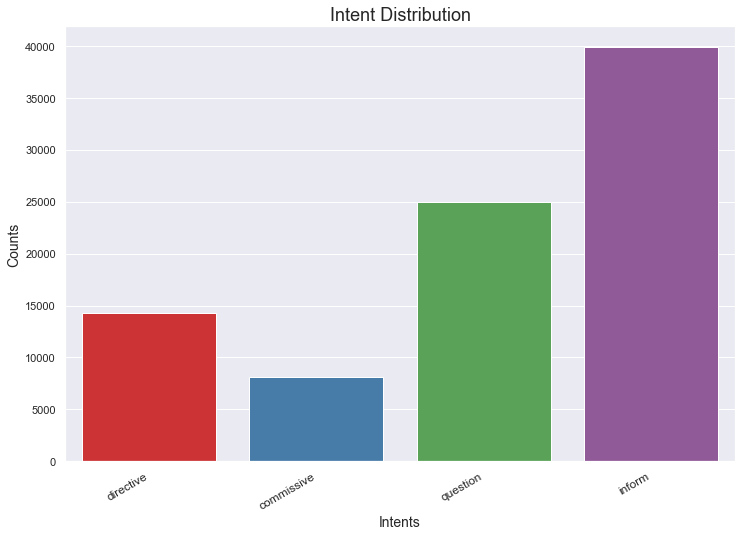

In [6]:
sns.set()
plt.figure(figsize = (12, 8))
chart = sns.countplot(x = 'Dialogue_Act', data = dyda_data_train, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 30, horizontalalignment='right', fontweight='light', fontsize='medium')
chart.set_title('Intent Distribution', fontsize = 18)
chart.set_xlabel('Intents', fontsize = 14)
chart.set_ylabel('Counts', fontsize = 14)
plt.show()

There are 4 types of labels : directive, commissive, question, inform sentence. Inform sentence are the majority of the conversation whereas directuve sentence are the least present in the dataset. 

In [7]:
# The one hot encoding of each 4 labels
from sklearn.preprocessing import LabelBinarizer
ohencoder=LabelBinarizer()
# Training data
trainlabels=dyda_data_train.copy()
trainlabels=trainlabels.pop('Dialogue_Act')
trainlabels=trainlabels.values

validlabels=dyda_data_valid.copy()
validlabels=validlabels.pop('Dialogue_Act')
validlabels=validlabels.values
#Train data
trainlabels=ohencoder.fit_transform(trainlabels)

# Test data
testlabels=ohencoder.transform(dyda_data_test['Dialogue_Act'].values)

# Validation data
validationlabels=ohencoder.transform(validlabels)



In [8]:
import tensorflow as tf
import tensorflow as tf

import tensorflow_text
import tensorflow_hub as hub

Ideas:
- Test BERT Uncased 512, 256, 768 and compare training time and accuracy


In [9]:

#Fonction qui prend le nom du modèle et retourne l'encodeur et le preprocessing correspondant

def modelname(bert_model_name):
#bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' # BERT SMALL 
#bert_model_name = 'small_bert/bert_en_uncased_L-4_H-256_A-4' #BERT MINI
#bert_model_name = 'small_bert/bert_en_uncased_L-8_H-512_A-8' # BERT MEDIUM
#bert_model_name = 'bert_en_uncased_L-12_H-768_A-12' # BERT BASE


    map_name_to_handle = {
        'bert_en_uncased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
        'bert_en_cased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
        'bert_multi_cased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
        'small_bert/bert_en_uncased_L-2_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-2_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-2_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-2_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-4_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-4_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-4_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-4_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-6_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-6_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-6_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-6_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-8_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-8_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-8_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-8_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-10_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-10_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-10_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-10_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-12_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-12_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-12_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
        'albert_en_base':
            'https://tfhub.dev/tensorflow/albert_en_base/2',
        'electra_small':
            'https://tfhub.dev/google/electra_small/2',
        'electra_base':
            'https://tfhub.dev/google/electra_base/2',
        'experts_pubmed':
            'https://tfhub.dev/google/experts/bert/pubmed/2',
        'experts_wiki_books':
            'https://tfhub.dev/google/experts/bert/wiki_books/2',
        'talking-heads_base':
            'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
    }

    map_model_to_preprocess = {
        'bert_en_uncased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'bert_en_cased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
        'small_bert/bert_en_uncased_L-2_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-2_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-2_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-2_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-4_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-4_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-4_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-4_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-6_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-6_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-6_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-6_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-8_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-8_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-8_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-8_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-10_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-10_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-10_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-10_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-12_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-12_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-12_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'bert_multi_cased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
        'albert_en_base':
            'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
        'electra_small':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'electra_base':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'experts_pubmed':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'experts_wiki_books':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'talking-heads_base':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    }
    global tfhub_handle_encoder
    global tfhub_handle_preprocess
    tfhub_handle_encoder = map_name_to_handle[bert_model_name]
    tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

    print(f'BERT model selected           : {tfhub_handle_encoder}')
    print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')
    

We are first going to use the smaller BERT model : The uncased 4 layers and 512 hidden 8 heads bert model
This model has less layers than the original BERT

Uncased means that the text has been lowercased before WordPiece tokenization

In [10]:
#bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
trainfeatures= dyda_data_train.copy()
trainfeatures.drop(columns=['Label','Dialogue_ID','Idx','Dialogue_Act'],inplace=True)

trainfeatures=trainfeatures.values
#trainlabels=silicone_data_train.copy()
#trainlabels=trainlabels.pop('Dialogue_Act')
#trainlabels=trainlabels.values

#validlabels=silicone_data_valid.copy()
#validlabels=validlabels.pop('Dialogue_Act')
#validlabels=validlabels.values
validfeatures= dyda_data_valid.copy()
validfeatures.drop(columns=['Label','Dialogue_Act','Idx','Dialogue_ID'],inplace=True)
validfeatures=validfeatures.values

testfeatures= dyda_data_test.copy()
testfeatures.drop(columns=['Label','Dialogue_Act','Idx','Dialogue_ID'],inplace=True)

testfeatures=testfeatures.values

#On one example : preprocessing of the text
#text_preprocessed = bert_preprocess_model(trainfeatures[0])

In [66]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)
bert_results = bert_model(text_preprocessed)
print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.966507    0.94429445 -0.06423417 -0.0197241   0.63926786  0.9950119
  0.5959118  -0.9253335  -0.1120009  -0.9995686   0.39983234 -0.9936137 ]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.33835638 -0.0467411  -0.02997465 ... -0.3669001   1.4788175
  -0.3349233 ]
 [ 0.43788114 -0.99399847 -0.12409517 ...  0.778103    0.7702269
  -0.9829068 ]
 [ 0.254839   -0.03344736 -0.09295289 ... -1.0249884   0.42819312
  -0.03980868]
 ...
 [-0.5199618  -0.5835654  -1.256384   ... -1.0467992   0.03804973
  -0.5100011 ]
 [-0.3712445  -1.2386633   0.4051054  ... -0.84075403  0.518483
  -0.9355118 ]
 [-0.947431    0.3716061   0.14260237 ... -0.08785975  1.641253
   0.20578286]]


In [11]:
#Definition of the model
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(4, activation=None, name='classifier')(net) # for dyda dataset
  
  return tf.keras.Model(text_input, net)



### SMALL BERT Model

In [42]:
#Small BERT Model
modelname('small_bert/bert_en_uncased_L-4_H-512_A-8' )
classifier_model = build_classifier_model()
classifier_model.summary()



BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                    

In [13]:


loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()
epochs=5


In [44]:



optimizer=tf.keras.optimizers.Adam(1e-5)
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)



In [71]:


# Model Training  
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=trainfeatures,y=trainlabels,
                               validation_data=(validfeatures,validationlabels),
                               batch_size=32,
                               epochs=epochs)



Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
2725/2725 [==============================] - 9945s 4s/step - loss: 0.5771 - categorical_accuracy: 0.7800 - val_loss: 0.5572 - val_categorical_accuracy: 0.7876
Epoch 2/5
2725/2725 [==============================] - 8125s 3s/step - loss: 0.5024 - categorical_accuracy: 0.8074 - val_loss: 0.5353 - val_categorical_accuracy: 0.7928
Epoch 3/5
2725/2725 [==============================] - 7602s 3s/step - loss: 0.4720 - categorical_accuracy: 0.8184 - val_loss: 0.5385 - val_categorical_accuracy: 0.7927
Epoch 4/5
2725/2725 [==============================] - 7787s 3s/step - loss: 0.4467 - categorical_accuracy: 0.8273 - val_loss: 0.5225 - val_categorical_accuracy: 0.7996
Epoch 5/5
2725/2725 [==============================] - 47604s 17s/step - loss: 0.4206 - categorical_accuracy: 0.8377 - val_loss: 0.5287 - val_categorical_accuracy: 0.8025


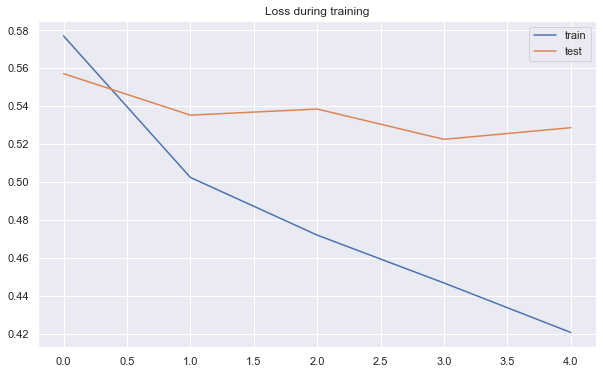

In [72]:
#PLot of loss during training
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(['train', 'test'])
plt.title('Loss during training')
plt.show();

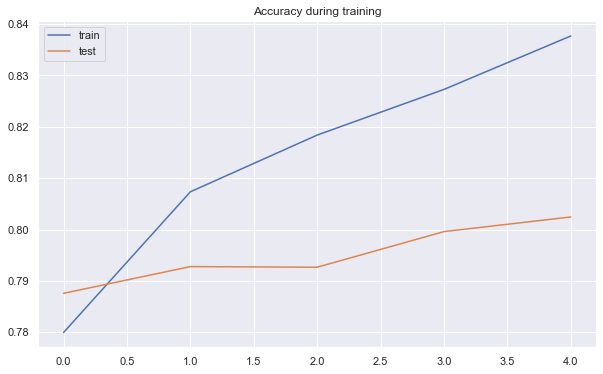

In [74]:
#Plot the accuracy during training
plt.figure(figsize = (10, 6))
plt.plot(history.history['categorical_accuracy'], label = 'train')
plt.plot(history.history['val_categorical_accuracy'], label = 'test')
plt.legend(['train', 'test'])
plt.title('Accuracy during training')
plt.show();

In [76]:
#Evaluation of the model
train_loss, train_accuracy = classifier_model.evaluate(trainfeatures, trainlabels)
test_loss, test_accuracy = classifier_model.evaluate(testfeatures, testlabels, batch_size = 16)
print("train_loss, train_accuracy:", train_accuracy)
print("test_loss, test_accuracy:", test_accuracy)


484/484 [==============================] - 260s 537ms/step - loss: 0.4641 - categorical_accuracy: 0.8266
train_loss, train_accuracy: 0.8694849014282227
test_loss, test_accuracy: 0.8266149759292603


### Mini BERT

In [46]:
modelname('small_bert/bert_en_uncased_L-4_H-256_A-4')
classifier_model = build_classifier_model()
classifier_model.summary()

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                    

In [50]:
optimizer=tf.keras.optimizers.Adam(1e-5)
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [51]:
# Model Training Mini BERT 
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=trainfeatures,y=trainlabels,
                               validation_data=(validfeatures,validationlabels),
                               batch_size=32,
                               epochs=epochs)



Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1
Epoch 1/5
2725/2725 [==============================] - 3532s 1s/step - loss: 0.6347 - categorical_accuracy: 0.7553 - val_loss: 0.5960 - val_categorical_accuracy: 0.7689
Epoch 2/5
2725/2725 [==============================] - 3439s 1s/step - loss: 0.5461 - categorical_accuracy: 0.7894 - val_loss: 0.5706 - val_categorical_accuracy: 0.7820
Epoch 3/5
2725/2725 [==============================] - 3287s 1s/step - loss: 0.5212 - categorical_accuracy: 0.8000 - val_loss: 0.5584 - val_categorical_accuracy: 0.7840
Epoch 4/5
2725/2725 [==============================] - 3252s 1s/step - loss: 0.5009 - categorical_accuracy: 0.8081 - val_loss: 0.5479 - val_categorical_accuracy: 0.7897
Epoch 5/5
2725/2725 [==============================] - 3327s 1s/step - loss: 0.4858 - categorical_accuracy: 0.8126 - val_loss: 0.5386 - val_categorical_accuracy: 0.7940


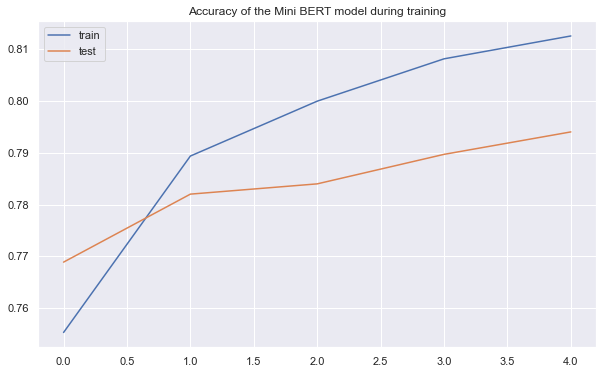

In [52]:
#Plot the accuracy during training
plt.figure(figsize = (10, 6))
plt.plot(history.history['categorical_accuracy'], label = 'train')
plt.plot(history.history['val_categorical_accuracy'], label = 'test')
plt.legend(['train', 'test'])
plt.title('Accuracy of the Mini BERT model during training')
plt.show();

In [53]:
#Evaluation of the model on the test data
train_loss, train_accuracy = classifier_model.evaluate(trainfeatures, trainlabels)
test_loss, test_accuracy = classifier_model.evaluate(testfeatures, testlabels, batch_size = 32)
print("train_loss, train_accuracy:", train_accuracy)
print("test_loss, test_accuracy:", test_accuracy)


242/242 [==============================] - 79s 324ms/step - loss: 0.4755 - categorical_accuracy: 0.8233
train_loss, train_accuracy: 0.8327062129974365
test_loss, test_accuracy: 0.8232558369636536


### Medium BERT

In [24]:
modelname('small_bert/bert_en_uncased_L-8_H-512_A-8')
classifier_model = build_classifier_model()
classifier_model.summary()

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                        

In [25]:
optimizer=tf.keras.optimizers.Adam(1e-5)
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
# Model Training Medium BERT 
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=trainfeatures,y=trainlabels,
                               validation_data=(validfeatures,validationlabels),
                               batch_size=32,
                               epochs=epochs)



Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1
Epoch 1/5
1129/2725 [===========>..................] - ETA: 2:24:55 - loss: 0.5861 - categorical_accuracy: 0.7889

In [ ]:
#Plot the accuracy during training
plt.figure(figsize = (10, 6))
plt.plot(history.history['categorical_accuracy'], label = 'train')
plt.plot(history.history['val_categorical_accuracy'], label = 'test')
plt.legend(['train', 'test'])
plt.title('Accuracy of the Medium BERT model during training')
plt.show();

In [ ]:
#Evaluation of the model on the test data
train_loss, train_accuracy = classifier_model.evaluate(trainfeatures, trainlabels)
test_loss, test_accuracy = classifier_model.evaluate(testfeatures, testlabels, batch_size = 32)
print("train_loss, train_accuracy:", train_accuracy)
print("test_loss, test_accuracy:", test_accuracy)


### Base BERT

In [21]:
modelname('bert_en_uncased_L-12_H-768_A-12')
classifier_model = build_classifier_model()
classifier_model.summary()

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [20]:
#import shutil
#shutil.rmtree("/var/folders/8m/snm9lyg5123c2612hsvml2jh0000gn/T/tfhub_modules/602d30248ff7929470db09f7385fc895e9ceb4c0")

In [22]:
optimizer=tf.keras.optimizers.Adam(1e-5)
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [23]:
# Model Training Base BERT 
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=trainfeatures,y=trainlabels,
                               validation_data=(validfeatures,validationlabels),
                               batch_size=32,
                               epochs=epochs)



Training model with https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Epoch 1/5
1621/2725 [================>.............] - ETA: 6:21:51 - loss: 0.5341 - categorical_accuracy: 0.7965

KeyboardInterrupt: 

In [ ]:
#Plot the accuracy during training
plt.figure(figsize = (10, 6))
plt.plot(history.history['categorical_accuracy'], label = 'train')
plt.plot(history.history['val_categorical_accuracy'], label = 'test')
plt.legend(['train', 'test'])
plt.title('Accuracy of the Base BERT model during training')
plt.show();

In [ ]:
#Evaluation of the  model on the test data
train_loss, train_accuracy = classifier_model.evaluate(trainfeatures, trainlabels)
test_loss, test_accuracy = classifier_model.evaluate(testfeatures, testlabels, batch_size = 32)
print("train_loss, train_accuracy:", train_accuracy)
print("test_loss, test_accuracy:", test_accuracy)


# Identification of Emotion/Sentiment 

In [77]:
# Loading the dyda_e dataset from silicone for emotion identification
dydae_data_train = load_dataset('silicone', 'dyda_e', split = 'train').to_pandas()
dydae_data_test = load_dataset('silicone', 'dyda_e', split = 'test').to_pandas()
dydae_data_valid = load_dataset('silicone', 'dyda_e', split = 'validation').to_pandas()

Generating train split:   0%|          | 0/87170 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8069 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7740 [00:00<?, ? examples/s]

Dataset silicone downloaded and prepared to /Users/serine/.cache/huggingface/datasets/silicone/dyda_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5. Subsequent calls will reuse this data.


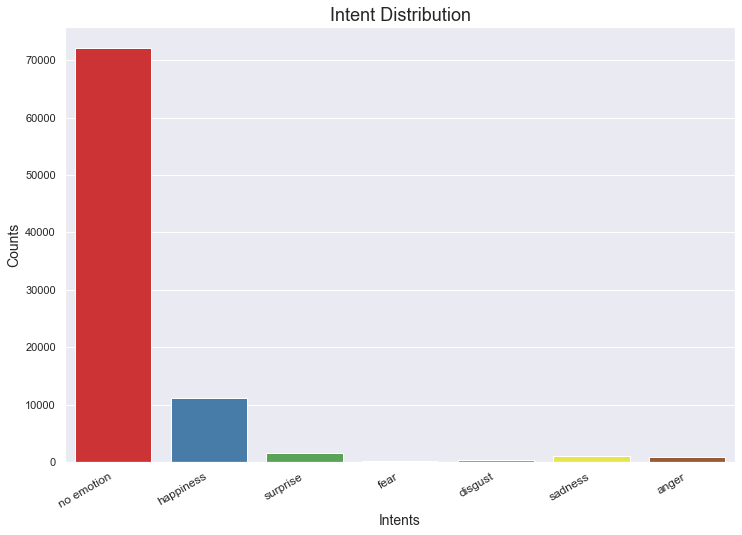

In [78]:
sns.set()
plt.figure(figsize = (12, 8))
chart = sns.countplot(x = 'Emotion', data = dydae_data_train, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 30, horizontalalignment='right', fontweight='light', fontsize='medium')
chart.set_title('Intent Distribution', fontsize = 18)
chart.set_xlabel('Intents', fontsize = 14)
chart.set_ylabel('Counts', fontsize = 14)
plt.show()

In [79]:
# The one hot encoding of each 4 labels
from sklearn.preprocessing import LabelBinarizer
ohencoder=LabelBinarizer()
# Training data
trainlabels=dydae_data_train.copy()
trainlabels=trainlabels.pop('Emotion')
trainlabels=trainlabels.values

validlabels=dydae_data_valid.copy()
validlabels=validlabels.pop('Emotion')
validlabels=validlabels.values
#Train data
trainlabels=ohencoder.fit_transform(trainlabels)

# Test data
testlabels=ohencoder.transform(dydae_data_test['Emotion'].values)

# Validation data
validationlabels=ohencoder.transform(validlabels)

We use the same model as previously which is the BERT small model 

In [80]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
trainfeatures= dydae_data_train.copy()
trainfeatures.drop(columns=['Label','Dialogue_ID','Idx','Emotion'],inplace=True)

trainfeatures=trainfeatures.values

validfeatures= dydae_data_valid.copy()
validfeatures.drop(columns=['Label','Emotion','Idx','Dialogue_ID'],inplace=True)
validfeatures=validfeatures.values

testfeatures= dydae_data_test.copy()
testfeatures.drop(columns=['Label','Emotion','Idx','Dialogue_ID'],inplace=True)

testfeatures=testfeatures.values

#On one example : preprocessing of the text
text_preprocessed = bert_preprocess_model(trainfeatures[0])

In [81]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)
bert_results = bert_model(text_preprocessed)
print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.966507    0.94429445 -0.06423417 -0.0197241   0.63926786  0.9950119
  0.5959118  -0.9253335  -0.1120009  -0.9995686   0.39983234 -0.9936137 ]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.33835638 -0.0467411  -0.02997465 ... -0.3669001   1.4788175
  -0.3349233 ]
 [ 0.43788114 -0.99399847 -0.12409517 ...  0.778103    0.7702269
  -0.9829068 ]
 [ 0.254839   -0.03344736 -0.09295289 ... -1.0249884   0.42819312
  -0.03980868]
 ...
 [-0.5199618  -0.5835654  -1.256384   ... -1.0467992   0.03804973
  -0.5100011 ]
 [-0.3712445  -1.2386633   0.4051054  ... -0.84075403  0.518483
  -0.9355118 ]
 [-0.947431    0.3716061   0.14260237 ... -0.08785975  1.641253
   0.20578286]]


In [82]:
#Definition of the model
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(7, activation=None, name='classifier')(net) # for dyda_e dataset
  
  return tf.keras.Model(text_input, net)



In [83]:
classifier_model = build_classifier_model()
classifier_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [84]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()



In [86]:
epochs=1
optimizer=tf.keras.optimizers.Adam(1e-5)
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)



In [87]:
# Model Training  
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=trainfeatures,y=trainlabels,
                               validation_data=(validfeatures,validationlabels),
                               batch_size=32,
                               epochs=epochs)



Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
2725/2725 [==============================] - 10041s 4s/step - loss: 0.4491 - categorical_accuracy: 0.8514 - val_loss: 0.2852 - val_categorical_accuracy: 0.8964


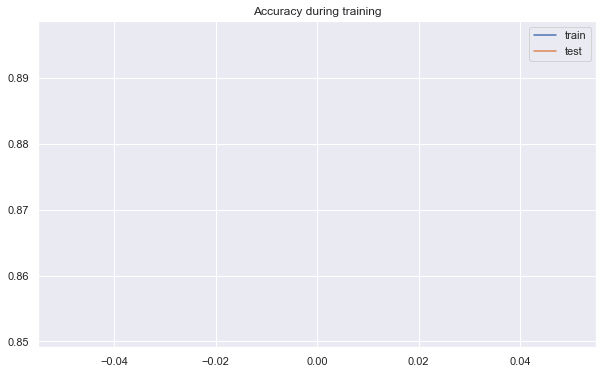

In [89]:
#Plot of the accuracy during training
plt.figure(figsize = (10, 6))
plt.plot(history.history['categorical_accuracy'], label = 'train')
plt.plot(history.history['val_categorical_accuracy'], label = 'test')
plt.legend(['train', 'test'])
plt.title('Accuracy during training')
plt.show();

In [91]:
#Evaluation of the model
train_loss, train_accuracy = classifier_model.evaluate(trainfeatures, trainlabels)
test_loss, test_accuracy = classifier_model.evaluate(testfeatures, testlabels, batch_size = 32)
print("train_loss, train_accuracy:", train_accuracy)
print("test_loss, test_accuracy:", test_accuracy)

2725/2725 [==============================] - 2457s 902ms/step - loss: 0.3784 - categorical_accuracy: 0.8663


NameError: name 'model' is not defined

In [92]:
test_loss, test_accuracy = classifier_model.evaluate(testfeatures, testlabels, batch_size = 32)
print("train_loss, train_accuracy:", train_accuracy)
print("test_loss, test_accuracy:", test_accuracy)

242/242 [==============================] - 216s 893ms/step - loss: 0.4409 - categorical_accuracy: 0.8521
train_loss, train_accuracy: 0.8663187026977539
test_loss, test_accuracy: 0.8520671725273132
